# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 


In [247]:
# If this cell does not work try running `pip install nbformat`

import io
from IPython import nbformat

nb = nbformat.read("lab2.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 891


## Group Number : 33

## Student 1 
### Name : Martijn van Meerten
### ID : 4387902

## Student 2
### Name : Yannick Haveman
### ID : 4299078

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

## 1. Familiarization task – 1 A4

### 1a. Plot visualizations 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neighbors import LocalOutlierFactor

In [231]:
df = pd.read_csv('SWaT_train.csv', skipinitialspace=True)

In [240]:
def plot_series(x, y, title='time series'):
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(13)

    sns.lineplot(x=x, y=y, color="blue")

    ax.set_title(title)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Value")
    plt.plot()
    return ax

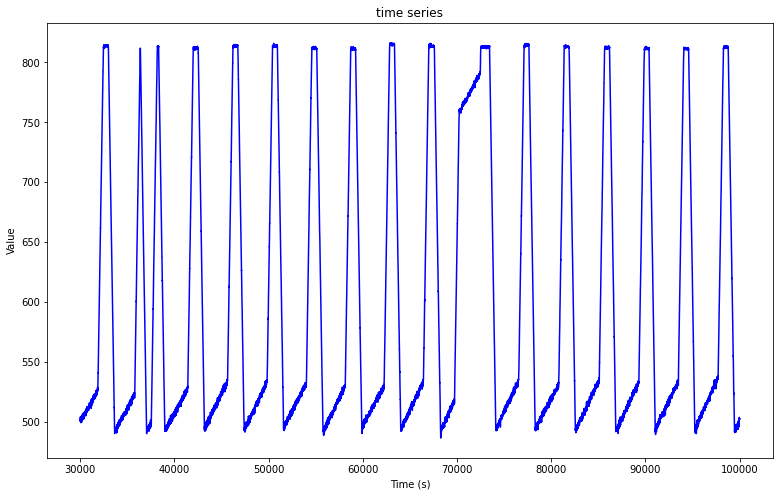

In [45]:
LIT101 = df['LIT101'][30000:100000]
plot_series(LIT101.index, LIT101)

<AxesSubplot:title={'center':'time series'}, xlabel='Time (s)', ylabel='Value'>

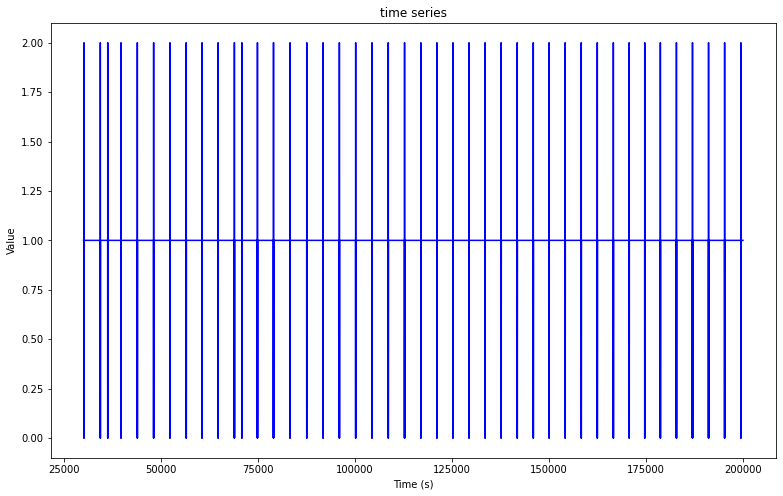

In [241]:
MV301 = df['MV301'][30000:200000]
plot_series(MV301.index, MV301)

<AxesSubplot:title={'center':'time series'}, xlabel='Time (s)', ylabel='Value'>

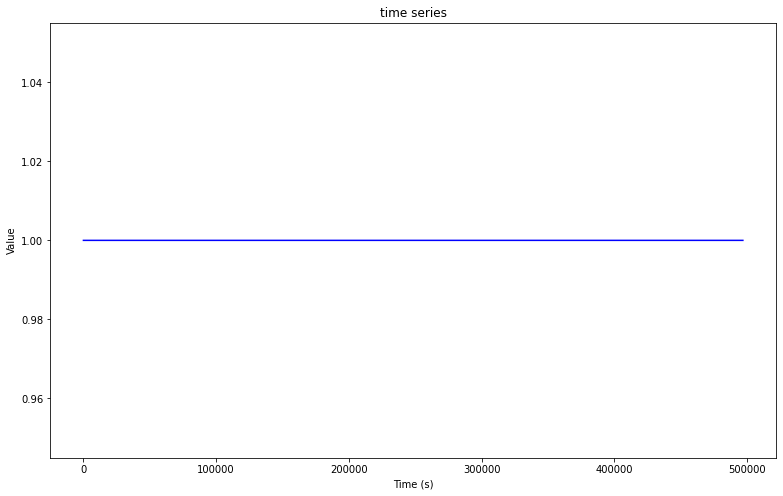

In [243]:
P201 = df['P201'][:]
plot_series(P201.index, P201)

### Cyclic behavior

Text(0, 0.5, 'Value')

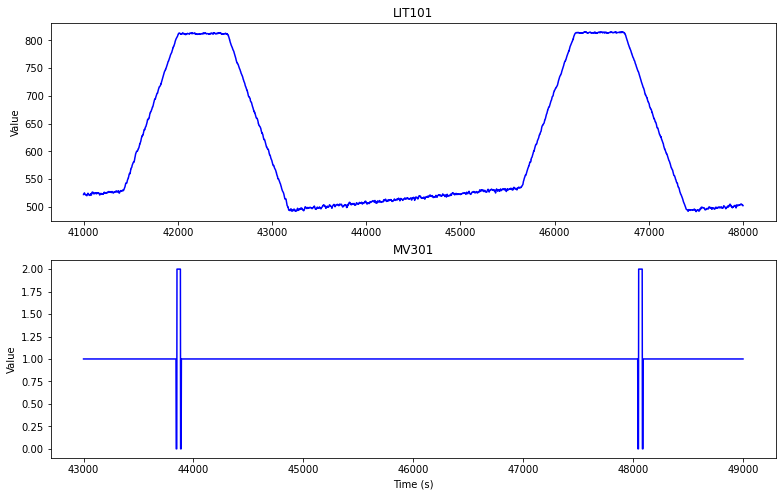

In [44]:
fig, ax = plt.subplots(2)
fig.set_figheight(8)
fig.set_figwidth(13)

LIT101 = df['LIT101'][41000:48000]
MV301 = df['MV301'][43000:49000]


sns.lineplot(x=LIT101.index, y=LIT101, color="blue", ax=ax[0])
sns.lineplot(x=MV301.index, y=MV301, color="blue", ax=ax[1])

ax[0].set_title("LIT101")
ax[1].set_title("MV301")
ax[1].set_xlabel("Time (s)")
ax[0].set_ylabel("Value")
ax[1].set_ylabel("Value")

### Predictions

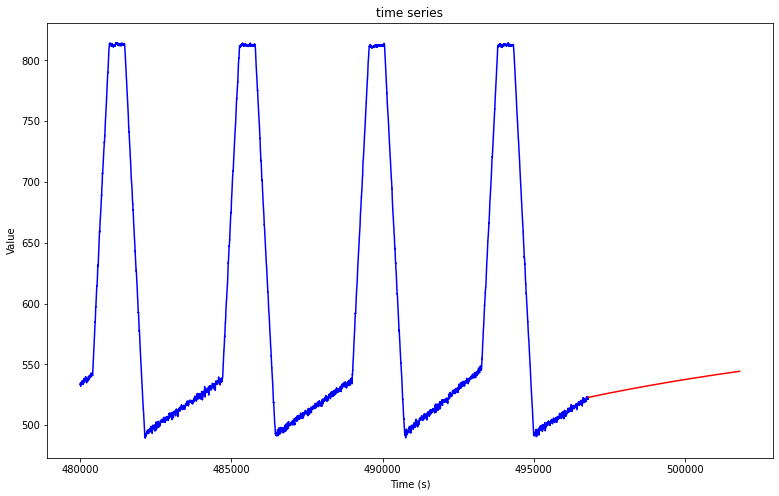

In [33]:
# Train model
model = ARIMA(df['LIT101'], order=(1, 0, 0))
model_fit = model.fit()

# Predict
yhat = model_fit.predict(len(df), len(df) + 5000)

ax = plot_series(range(480000, len(df)), df['LIT101'][480000:len(df)].to_numpy())
sns.lineplot(x=range(len(df), len(df) + 5001), y=yhat, color="red", ax=ax);

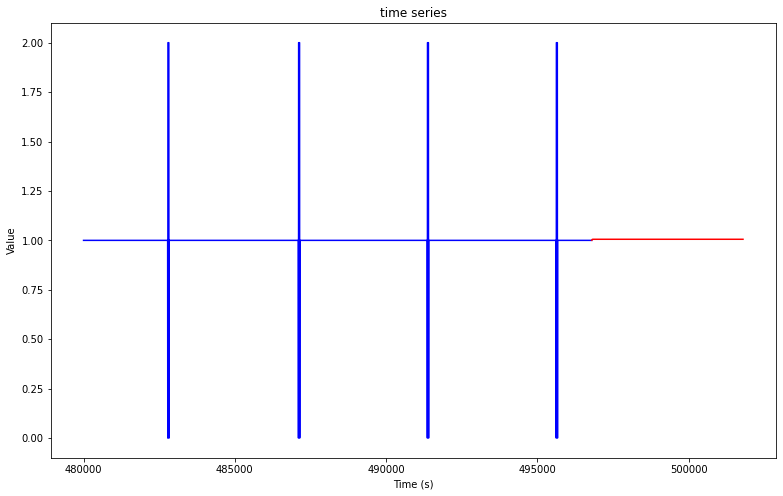

In [36]:
# Train model
model = ARIMA(df['MV301'], order=(1, 0, 0))
model_fit = model.fit()

# Predict
yhat = model_fit.predict(len(df), len(df) + 5000)
#predicted_series = np.append(df['LIT101'][480000:len(df)].to_numpy(), [yhat])
#print(len (predicted_series))
#print(len(range(480000, len(df) + 5001)))
ax = plot_series(range(480000, len(df)), df['MV301'][480000:len(df)].to_numpy())
sns.lineplot(x=range(len(df), len(df) + 5001), y=yhat, color="red", ax=ax);

c:\users\martijn.vanmeerten\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\martijn.vanmeerten\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


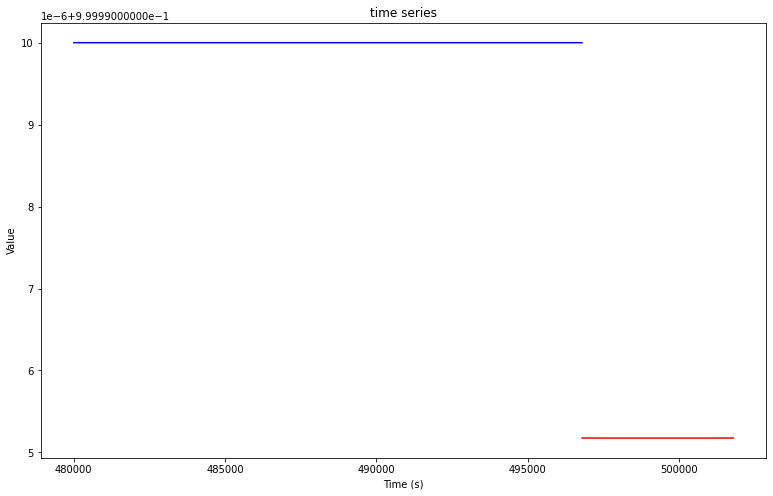

In [244]:
# Train model
model = ARIMA(df['P201'], order=(1, 0, 0))
model_fit = model.fit()

# Predict
yhat = model_fit.predict(len(df), len(df) + 5000)

ax = plot_series(range(480000, len(df)), df['P201'][480000:len(df)].to_numpy().astype(int))
sns.lineplot(x=range(len(df), len(df) + 5001), y=yhat, color="red", ax=ax);

### 1b. Answers to the three questions

According to the SWAT paper, the first 5 hours are used to fill up the tanks for the first time. Some signals suggest a longer time is required to get to normal operation. Therefore, we visualize the data from 8 hours after putting the system in operation.
1. The above three signals all differ from each other. LIT101 is a sensor and continuous value and is able to take on values in a range from roughly 500 to 820, FIT301 is an actuator, which is able to take on three different values: 0, 1 and 2. The last signal, P201, is also an actuator, but is constant at 1.
2. The signals are clearly correlated. Figure 4 shows the cyclic behaviour of LIT101 and MV301. P201 is constant and therefore this applies as well.
3. If we examine the different series it should be easy to predict the next values. They all show cyclic behavior. The fitted model predicts the next values in the series decently accurately for the first two signals. This is probably because the signals are quite constant most of the time. Whenever a signal changes its value drastically and infrequently, like the actuator MV301, correctly predicting the next value will be more difficult.

## 6.Comparision task 1 A4 - Individual

### Pre-processing

In [52]:
df = pd.read_csv('SWaT_train.csv', skipinitialspace=True)
df.drop(columns=["Timestamp", "Normal/Attack"], inplace=True)
df = df[30000:]
X = df.to_numpy()
df_test = pd.read_csv('SWaT_test.csv', skipinitialspace=True)
df_test.loc[df_test['Normal/Attack'] == 'Attack', 'Normal/Attack'] = 1 # Attack
df_test.loc[df_test['Normal/Attack'] == 'Normal', 'Normal/Attack'] = 0 # Normal
y = df_test['Normal/Attack'].to_numpy().astype(int)
df_test.drop(columns=["Unnamed: 0", "Timestamp", "Normal/Attack"], inplace=True)
X_test = df_test.to_numpy()

### LOF

In [94]:
### Running LOF takes a long time (>10m). The decision to use cosine distance excluded the option to use a kd-tree ###

# Take a slice from the training data without the large abnormality (see task 2) to reduce computation time.
X_LOF = X[51930:100000]
# n_neighbors is 20 (see task 2)
clf = LocalOutlierFactor(n_neighbors=20, metric='cosine', novelty=True, n_jobs=-1)
clf = clf.fit(X_LOF)

In [96]:
scores = clf.score_samples(X_test)

array([-1, -1, -1, ..., -1, -1, -1])

array([-2951.82510918, -2951.82510918, -2951.82510918, ...,
       -2951.82510918, -2951.82510918, -2951.82510918])

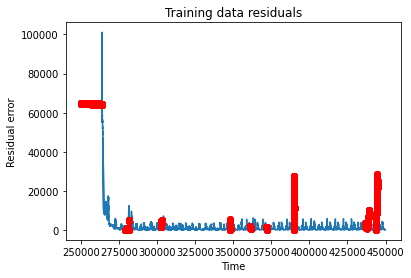

In [127]:
start = 250000
end = 500000
scoresdf = pd.DataFrame(scores * -1)
fig, ax = plt.subplots()
ax.plot(scoresdf[start:end])
ax.plot(scoresdf[start:end][y[start:end]==1], 'ro', label='Attack')
ax.set_xlabel('Time')
ax.set_ylabel('Residual error')
ax.set_title('Training data residuals')
scores[y]

In [221]:
# Manually fine-tuned threshold value to maximize the score as defined below
threshold = 3500
y_LOF = scoresdf > threshold
y_LOF = np.reshape(y_LOF.to_numpy(), len(y_LOF))

### ARMA

From task 5 we determined ARMA works well for LIT101 and DPIT301. Therefore, we will combine models for these signals to predict anomalies, i.e. if either model considers a point an anomaly, we consider it an anomaly. Referring to the training data residuals in task 5, we conclude a proper threshold for the residual errors for both signals is 4.

In [76]:
LIT = ARIMA(df['LIT101'], order=(4, 0, 0)).fit()
DPIT = ARIMA(df['DPIT301'], order=(3, 0, 0)).fit()
LIT_test = LIT.apply(df_test['LIT101'])
DPIT_test = DPIT.apply(df_test['DPIT301'])
LIT_res = LIT_test.resid.to_numpy()
DPIT_res = DPIT_test.resid.to_numpy()
y_LIT = (np.abs(LIT_res) > 4)
y_DPIT = (np.abs(DPIT_res) > 4)
y_ARMA = np.logical_or(y_LIT, y_DPIT).astype(int)

49

In [229]:
y_LIT = (np.abs(LIT_res) > 4)
y_DPIT = (np.abs(DPIT_res) > 4)
y_ARMA = np.logical_or(y_LIT, y_DPIT).astype(int)

### Evaluation

In [246]:
# Compute array with indices of attack start and end
y_index = np.where(y[:-1] != y[1:])[0] + 1

def compute_STTD(y_index, y_pred):
    number_of_attacks = int(len(y_index) / 2)
    attack_sum = 0
    for i in range(number_of_attacks):
        attack_start_index = y_index[2*i]
        attack_stop_index = y_index[2*i+1]
        attack_duration = y_index[2*i+1] - y_index[2*i]
        v = 0
        j = 0
        while v == 0 and j < attack_duration:
            v = y_pred[i + j]
            j += 1
            
        attack_sum += (j-1) / (attack_stop_index - attack_start_index)
    
    return 1 - (1 / number_of_attacks) * attack_sum

def compute_SCM(y_true, y_pred):
    TP = (y_true.astype(bool) & y_pred.astype(bool)).sum()
    TPR = TP / np.count_nonzero(y_pred == 1)
    TN = (np.logical_not(y_true.astype(bool)) & np.logical_not(y_pred.astype(bool))).sum()
    TNR = TN / np.count_nonzero(y_pred == 0)
    return (TPR + TNR) / 2

def evaluate(y_true, y_pred, gamma):
    # Compute array with indices of attack start and end
    y_index = np.where(y_true[:-1] != y_true[1:])[0] + 1
    S_ttd = compute_STTD(y_index, y_pred)
    S_scm = compute_SCM(y_true, y_pred)
    score = gamma * S_ttd + (1 - gamma) * S_scm
    FP = (y_true.astype(bool) & np.logical_not(y_pred.astype(bool))).sum()
    return score, S_ttd, S_scm, FP


LOF_score, LOF_sttd, LOF_scm, LOF_FP = evaluate(y, y_LOF, 0.5)
ARMA_score, ARMA_sttd, ARMA_scm, ARMA_FP = evaluate(y, y_ARMA, 0.5)
print('LOF: score: {}, sttd: {}, scm: {}, FP: {}'.format(LOF_score, LOF_sttd, LOF_scm, LOF_FP))
print('ARMA: score: {}, sttd: {}, scm: {}, FP: {}'.format(ARMA_score, ARMA_sttd, ARMA_scm, ARMA_FP))

LOF: score: 0.9161563362346176, sttd: 0.9879887452541862, scm: 0.8443239272150489, FP: 17516
ARMA: score: 0.3863591863909685, sttd: 0.057084355154168764, scm: 0.7156340176277682, FP: 53873


### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

For determining a good comparison and evaluation framework we first need to determine the requirements for the application. Here we want to detect attacks on a SCADA system. It is important that all attacks are detected (false negatives are more important than false positives) and that attacks are detected as quickly as possible in order to take action before the attacker is able to inflict damage to the system. Attacks usually occur over time and therefore traverse many data points. Therefore, we want a metric that accounts for both the delay in detection and the overall detection. For this, we use the score as explained in lecture 3, slide 103, as this captures both requirements.

The final score is a combination of $S_{ttd}$ and $S_{scm}$. $S_{ttd}$ is a score that averages the time-till-detection of a model over all attacks. Early discovery results in a higher score. This metric is not sufficient on its own, as the score would be 1 if all data points are found to be anomalous. $S_{scm}$ is the average of the **TPR** and **TNR** and measures performance based on individual point detection. The weight of both scores can be controlled by $\gamma$. We choose $\gamma = 0.5$, as we deem both scores to be of equal importance.

Above, you can find the results of the evaluation. LOF performs quite well with a score of 0.916. $S_{ttd} = 0.988$ suggests that it detects attacks early and $S_{scm} = 0.844$ suggests that the overall point detection is reasonably accurate. The threshold value for LOF can be decreased to get less false negatives or increased to get less false positives. It is interesting to note that the LOF scores for the test data are all very high compared to the LOF scores for the training data.

ARMA performs poorly. In this approach we only use two out of the 51 available signals. With more time, all signals can be studied to determine if an ARMA model performs well on that signal. This will most likely greatly increase the performance of the method.

*(TODO: Vul aan en verander met resultaten van jouw deel)*

While LOF obtains a good score, but the number of false positives is still 17516. For an alarm to go off this often over a matter of days would not be a practical solution. Despite this, this is still the best performing method and can surely be improved upon.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.